In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Basic Analysis**

**1. Un-nesting the columns**

a. Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

In [ ]:
Columns_to_unnesting=['cast','listed_in','country']
for column in Columns_to_unnesting:
  df[column]=df[column].str.split(', ')
  df=df.explode(column)

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


**2. Handling null values**

a. For categorical variables with null values, update those rows as
unknown_column_name.

In [ ]:
Categorical_columns=['director','cast','country','rating']
for column in Categorical_columns:
  df[column]=df[column].fillna(f"Unknown {column}")

In [ ]:
df.loc[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


3 missing values are found in duration column , and it is also found that by mistake those data got entered in rating column

In [ ]:
ind = df[df['duration'].isna()].index

In [ ]:
df.loc[ind] = df.loc[ind].fillna(method = 'ffill' , axis = 1)

In [ ]:
df.loc[ind,'rating']='Unknown rating'

In [ ]:
df.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added      158
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
df.drop(df.loc[df['date_added'].isna()].index,axis=0,inplace=True)

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**What does ‘good’ look like?**
______________________________________________________________________________

**1.** Find the counts of each categorical variable both using graphical and non-
graphical analysis.

**a**. For Non-graphical Analysis:

In [ ]:
#listed_in
df.groupby('listed_in')['title'].nunique().sort_values(ascending=False)

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows             

As we seen from above list that top 5 watching genres are International Movies,Dramas,Comedies,International TV Shows and Documentaries,and most less watching genres are Classic & Cult TV ,TV shows


In [ ]:
#Rating
df.groupby('rating')['title'].nunique().sort_values(ascending=False)

rating
TV-MA             3205
TV-14             2157
TV-PG              861
R                  799
PG-13              490
TV-Y7              333
TV-Y               306
PG                 287
TV-G               220
NR                  79
G                   41
Unknown rating       7
TV-Y7-FV             6
NC-17                3
UR                   3
Name: title, dtype: int64

Top 5 Rating which people give to most of the TV shows and movies are TV-MA,TV-14,TV-PG,R,PG-13

**b**. For graphical analysis:

**listed_in**

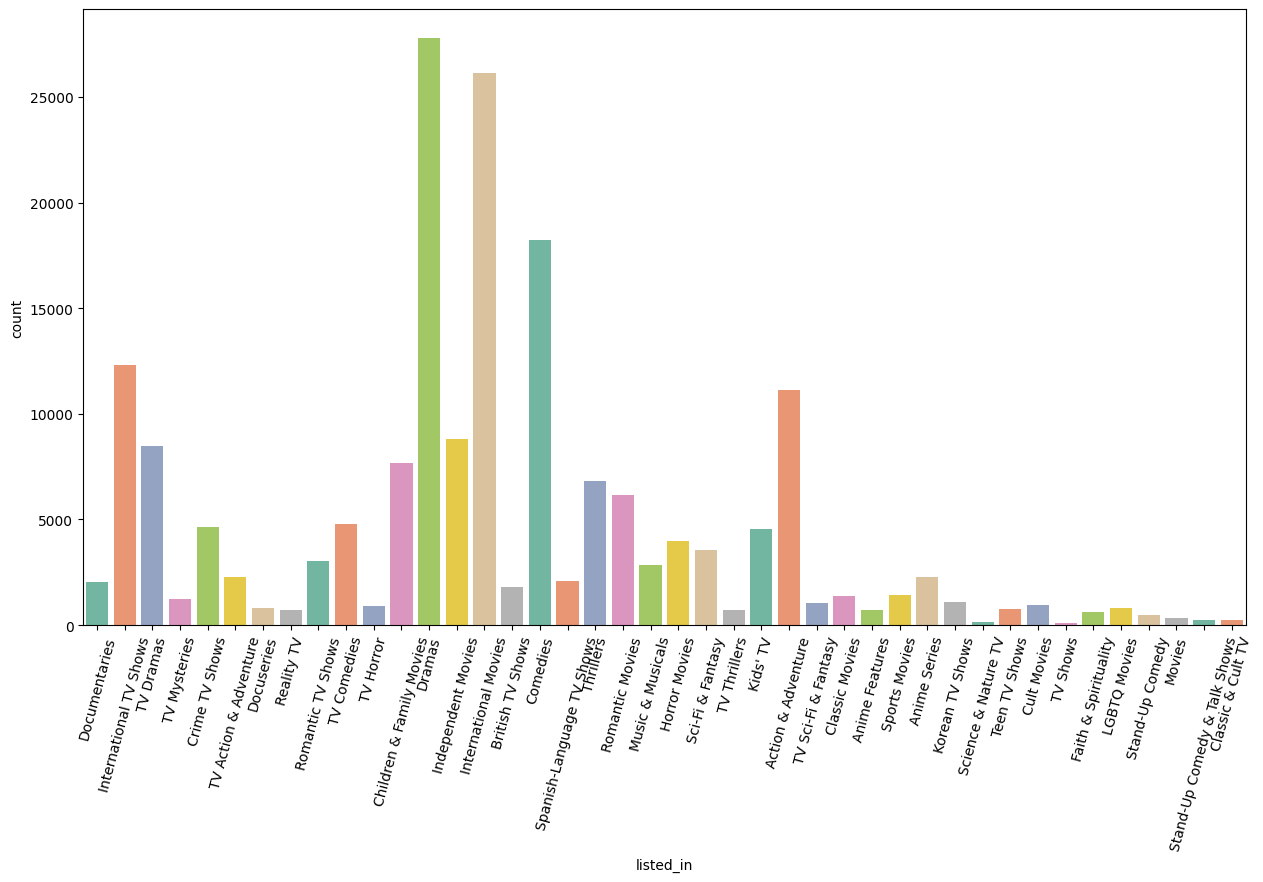

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='listed_in',data=df,palette='Set2')
plt.xticks(rotation=75)
plt.show()

**rating**

<Axes: xlabel='rating', ylabel='count'>

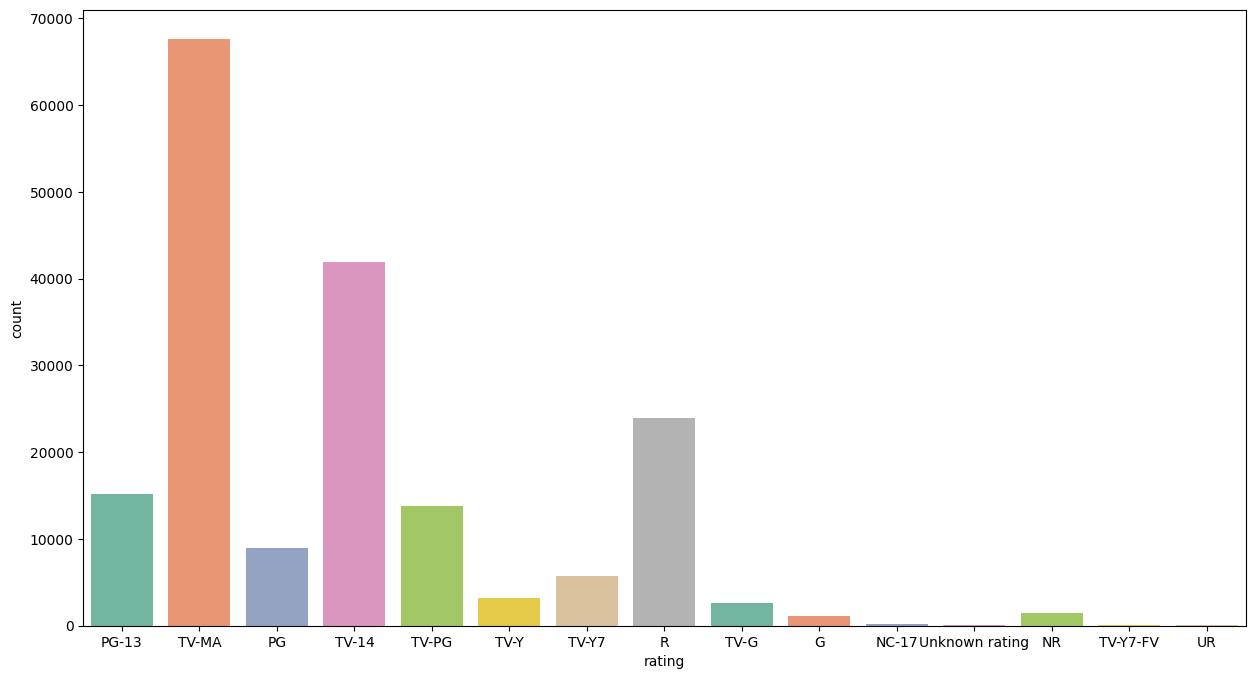

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='rating',data=df,palette='Set2')

***2. Comparison of tv shows vs. movies.***

**a**. Find the number of movies produced in each country and pick the top 10
countries.

In [ ]:
df_movies=df.loc[df['type']=='Movie']

In [ ]:
df_movies.groupby('country')['title'].nunique().sort_values(ascending=False).iloc[0:10]

country
United States      2751
India               962
United Kingdom      532
Unknown country     440
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: title, dtype: int64

As we seen United States & India are the top movie producing Countries

**b**. Find the number of Tv-Shows produced in each country and pick the top 10
countries.

In [ ]:
df_TVshow=df.loc[df['type']=='TV Show']

In [ ]:
df_TVshow.groupby('country')['title'].nunique().sort_values(ascending=False).iloc[0:10]

country
United States      932
Unknown country    390
United Kingdom     271
Japan              198
South Korea        170
Canada             126
France              90
India               84
Taiwan              70
Australia           65
Name: title, dtype: int64

As we seen United States & United Kingdom are the top TV shows producing Countries

**3. What is the best time to launch a TV show?**

**a**. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

first we have to convert date_added column into datetime format

In [ ]:
df['date_added'] = df['date_added'].apply(lambda x : x.strip())

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])

We can create columns month_added,year_added and week_added by extracting month,year and week from date_added column

In [ ]:
df['month_added']=df['date_added'].dt.month


In [ ]:
df['year_added']=df['date_added'].dt.year

In [ ]:
df['week_added']=df['date_added'].dt.strftime('%U')


In [ ]:
df_TVshow=df.loc[df['type']=='TV Show']


In [ ]:
df_TVshow.groupby('week_added')['title'].nunique().sort_values(ascending=False)[0:5].reset_index(name='No_of_shows_released')

,week_added,No_of_shows_released
0,39,94
1,31,86
2,26,84
3,13,83
4,27,82


As we Analyse,39th,31st,26th,13th and 27th week are the best week to release a tv show on netflix


In [ ]:
df_movies=df.loc[df['type']=='Movie']

In [ ]:
df_movies.groupby('week_added')['title'].nunique().sort_values(ascending=False)[0:5].reset_index(name='No_of_movies_released')

,week_added,No_of_movies_released
0,00,251
1,39,241
2,26,234
3,13,231
4,43,204


As we Analyse,1st,39st,26th,13th and 43rd week are the best week to release a tv show on netflix

**b**. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [ ]:
df_TVshow.groupby('month_added')['title'].nunique().sort_values(ascending=False)[0:5].reset_index(name='No_of_shows_released')

,month_added,No_of_shows_released
0,12,266
1,7,262
2,9,251
3,6,236
4,8,236


The best month to upload will be between 12th , 7th, 9th month as there will be moderate traffic and people will be able to watch every movie that's been released. And would rate them accoridngly. In the peak months a lot of shows are added because of which shows are left out and are not watched
because of multiple options.

In [ ]:
df_movies.groupby('month_added')['title'].nunique().sort_values(ascending=False)[0:5].reset_index(name='No_of_movies_released')

,month_added,No_of_movies_released
0,7,565
1,4,550
2,12,547
3,1,546
4,10,545


As we seen 7th,4th and last month are the best month for releasing a movie on netflix

**4. Analysis of actors/directors of different types of shows/movies.**

a. Identify the top 10 Actors who have appeared in most movies or TV shows.

In [ ]:
df.groupby('cast')['title'].nunique().sort_values(ascending=False)[0:10].reset_index(name='No. of movies/TV shows')

,cast,No. of movies/TV shows
0,Unknown cast,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29


As we seen from the above list,Top 10 actors cast in most of the TV shows and movies are most of Indians ,Anupam Kher is the actor which is cast in most od the movies available on netflix

**b**. Identify the top 10 directors who have appeared in most movies or TV shows.

In [ ]:
df.groupby('director')['title'].nunique().sort_values(ascending=False)[0:10].reset_index(name='No. of movies/TV shows')

,director,No. of movies/TV shows
0,Unknown director,2624
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12


The top Directors are Rajiv Chilaka , Raul campos, Marcus, Raboy , Suhas kadav these are top directors which has the most no. of occurences


**5. Which genre movies are more popular or produced more**

In [ ]:
from wordcloud import WordCloud

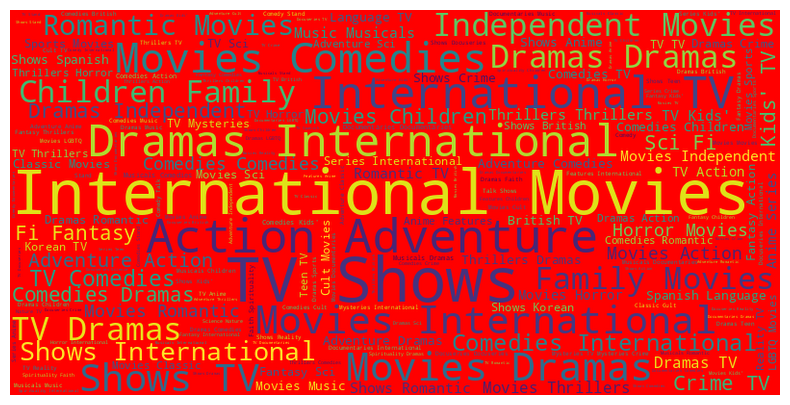

In [ ]:
text=' '.join(df['listed_in'])
wordcloud=WordCloud(width=800,height=400,background_color='red').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='lanczos')
plt.axis('off')
plt.show()

The top genre of people who prefer watching movies / tv shows are Comedies , International TV,Romantic movies, Action Adventure, Family movies, Dramas.

**6. Find After how many days the movie will be added to Netflix after the release of the movie.**

In [ ]:
df['diff_of_year']=df['year_added']-df['release_year']

In [ ]:
df['diff_of_year']

0       1
1       0
1       0
1       0
1       0
       ..
8806    4
8806    4
8806    4
8806    4
8806    4
Name: diff_of_year, Length: 186167, dtype: object

In [ ]:
df['diff_of_year'].mode()

0    0
Name: diff_of_year, dtype: object

As we found Majority of movies/ tv shows are added and released in the same year itself.

**Understanding what content is available in different countries**

In [ ]:
df.groupby(['country','listed_in']).count()['title']

country       listed_in             
              Dramas                     8
              Independent Movies         8
              International Movies       8
              International TV Shows     4
              TV Dramas                  4
                                        ..
West Germany  Thrillers                 10
Zimbabwe      Comedies                  12
              Documentaries              2
              International Movies      14
              Romantic Movies           12
Name: title, Length: 1464, dtype: int64

My analysis is that majority of countries prefer watching international movies. Australia prefers british shows , anime series, action and adventure .Argentina prefers family and childrens. Austria prefers crime tv shows and documentaries. bahamas only watch action and adventure. Cambodia prefers Dramas and International Movies Cameroon prefers Dramas and International Movies Cuba prefers Crime TV Shows International TV Shows and Spanish-Language TV Shows Cyprus prefers Kids' TV and TV Comedies Dominican Republic prefer Horror Movies , International Movies ,Thrillers East Germany prefers Children.
